In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/data-export (1).csv')

In [3]:
df.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [4]:
df.iloc[0,0]="channel group"
df.iloc[0,1]="Date Hour"
df.head(2)

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,channel group,Date Hour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402


In [5]:
df.columns = df.iloc[0]
df = df.drop(index=0).reset_index(drop=True)
df.head(2)

,channel group,Date Hour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   channel group                        3182 non-null   object
 1   Date Hour                            3182 non-null   object
 2   Users                                3182 non-null   object
 3   Sessions                             3182 non-null   object
 4   Engaged sessions                     3182 non-null   object
 5   Average engagement time per session  3182 non-null   object
 6   Engaged sessions per user            3182 non-null   object
 7   Events per session                   3182 non-null   object
 8   Engagement rate                      3182 non-null   object
 9   Event count                          3182 non-null   object
dtypes: object(10)
memory usage: 248.7+ KB


In [7]:
df['Date Hour'] = pd.to_datetime(df['Date Hour'], format='%Y%m%d%H' ,errors='coerce')
df['Hour'] = df['Date Hour'].dt.hour
df.head()

,channel group,Date Hour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001,20


In [8]:
numeric_col = df.columns.drop(['channel group','Date Hour'])
df[numeric_col] = df[numeric_col].apply(pd.to_numeric, errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   channel group                        3182 non-null   object        
 1   Date Hour                            3182 non-null   datetime64[ns]
 2   Users                                3182 non-null   int64         
 3   Sessions                             3182 non-null   int64         
 4   Engaged sessions                     3182 non-null   int64         
 5   Average engagement time per session  3182 non-null   float64       
 6   Engaged sessions per user            3182 non-null   float64       
 7   Events per session                   3182 non-null   float64       
 8   Engagement rate                      3182 non-null   float64       
 9   Event count                          3182 non-null   int64         
 10  Hour        

In [9]:
df.describe()

,Date Hour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441216,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,11.807040
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:15:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,6.886686


# Sessions and Users Over Time

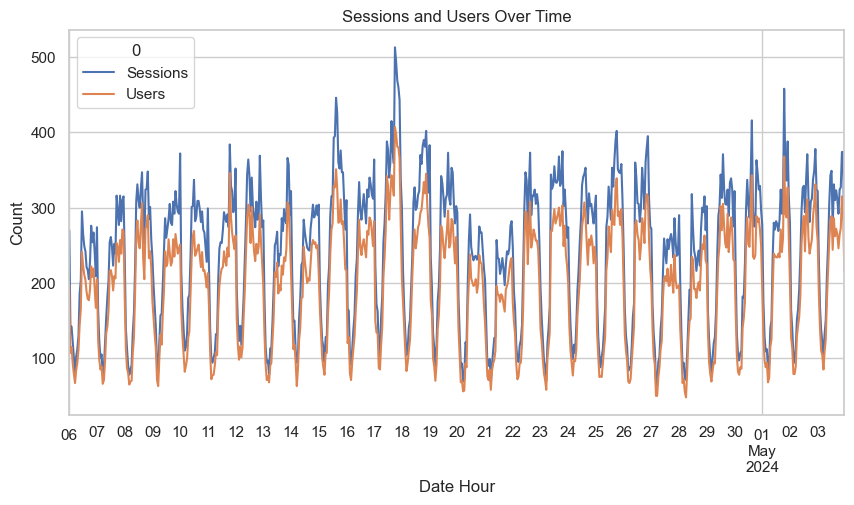

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
df.groupby("Date Hour")[["Sessions","Users"]].sum().plot(ax=plt.gca())
plt.title('Sessions and Users Over Time')
plt.xlabel('Date Hour')
plt.ylabel('Count')
plt.show()

# Total User By Channel

C:\Users\DELL Inspiron\AppData\Local\Temp\ipykernel_9656\3028932838.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="channel group", y="Users", estimator=np.sum, palette="viridis")


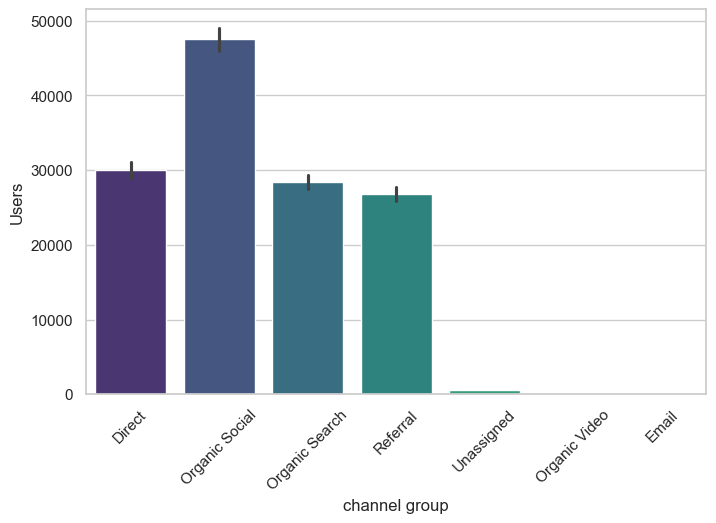

In [11]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="channel group", y="Users", estimator=np.sum, palette="viridis")
plt.xticks(rotation=45)
plt.show()

# Average engagement time by channel

C:\Users\DELL Inspiron\AppData\Local\Temp\ipykernel_9656\3984707210.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="channel group", y="Average engagement time per session", estimator=np.mean, palette="magma")


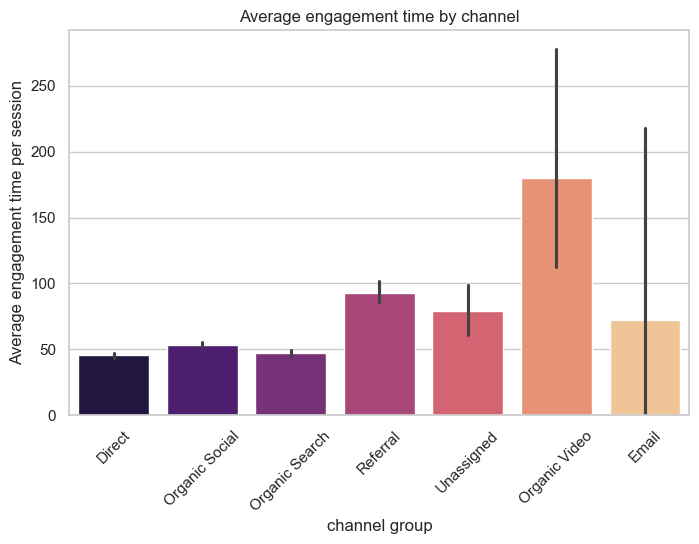

In [12]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="channel group", y="Average engagement time per session", estimator=np.mean, palette="magma")
plt.title('Average engagement time by channel')
plt.xticks(rotation=45)
plt.show()

# Engagement rate distribution by channel

C:\Users\DELL Inspiron\AppData\Local\Temp\ipykernel_9656\2908777170.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="channel group", y="Engagement rate", palette="coolwarm")


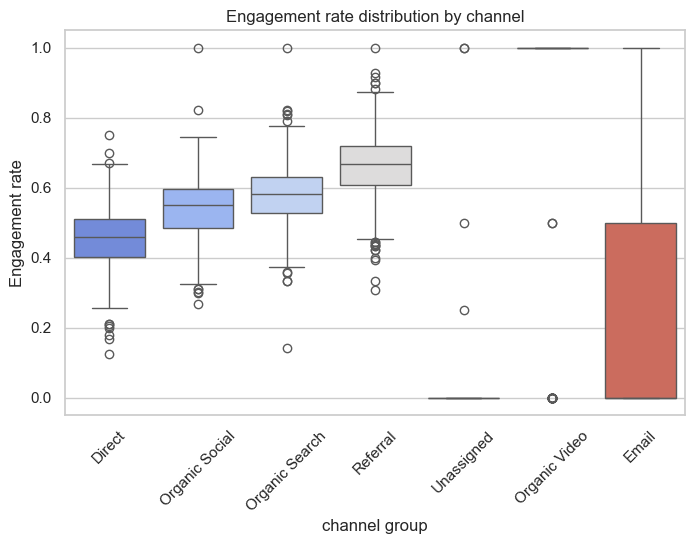

In [13]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="channel group", y="Engagement rate", palette="coolwarm")
plt.title('Engagement rate distribution by channel')
plt.xticks(rotation=45)
plt.show()

# Engaged vs Non-Engaged Sessions

In [14]:
session_df = df.groupby('channel group')[['Sessions','Engaged sessions']].sum().reset_index()
session_df['non-Engaged sessions'] = session_df['Sessions'] - session_df['Engaged sessions']
session_df_melt = session_df.melt(
    id_vars='channel group', 
    value_vars=['Engaged sessions', 'non-Engaged sessions'],
    var_name='variable',
    value_name='value'
)
session_df_melt.head()

,channel group,variable,value
0,Direct,Engaged sessions,17243
1,Email,Engaged sessions,1
2,Organic Search,Engaged sessions,19425
3,Organic Social,Engaged sessions,32697
4,Organic Video,Engaged sessions,109


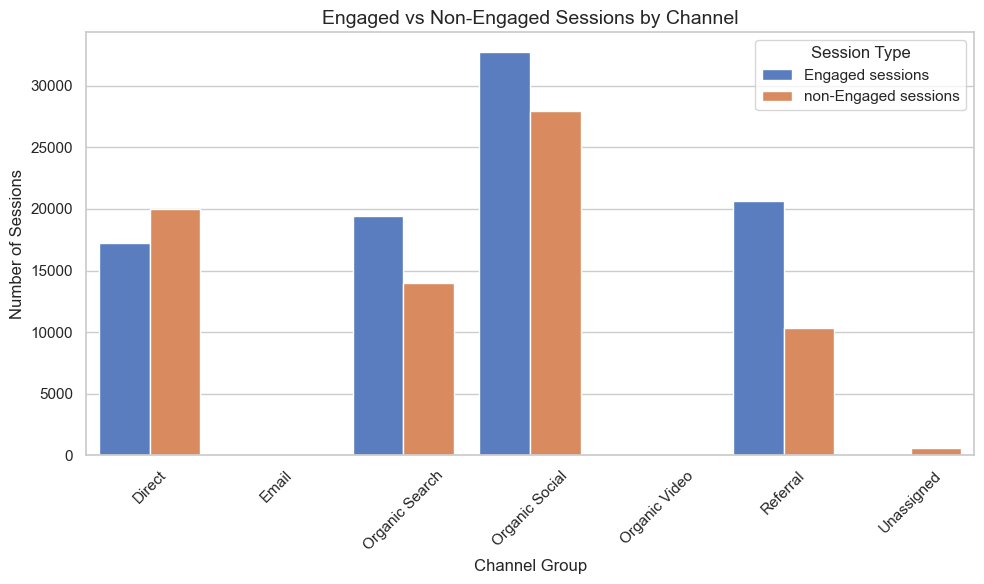

In [15]:
plt.figure(figsize=(10, 6)) 
sns.barplot(
    data=session_df_melt, 
    x="channel group", 
    y="value", 
    hue="variable", 
    palette="muted"
)

plt.title('Engaged vs Non-Engaged Sessions by Channel', fontsize=14)
plt.ylabel('Number of Sessions')
plt.xlabel('Channel Group')
plt.xticks(rotation=45)

plt.legend(title='Session Type')
plt.tight_layout() 
plt.show()

# Traffic by Hour and Channel

In [16]:
heatmap_df = df.groupby(['Hour','channel group'])['Sessions'].sum().unstack().fillna(0)
heatmap_df.head()

channel group,Direct,Email,Organic Search,Organic Social,Organic Video,Referral,Unassigned
Hour,,,,,,,
0,1684.0,0.0,1311.0,3917.0,6.0,1204.0,26.0
1,1196.0,0.0,984.0,2108.0,5.0,923.0,12.0
2,887.0,1.0,804.0,1537.0,2.0,755.0,13.0
3,771.0,0.0,606.0,1249.0,2.0,560.0,11.0
4,666.0,1.0,535.0,1081.0,2.0,495.0,6.0


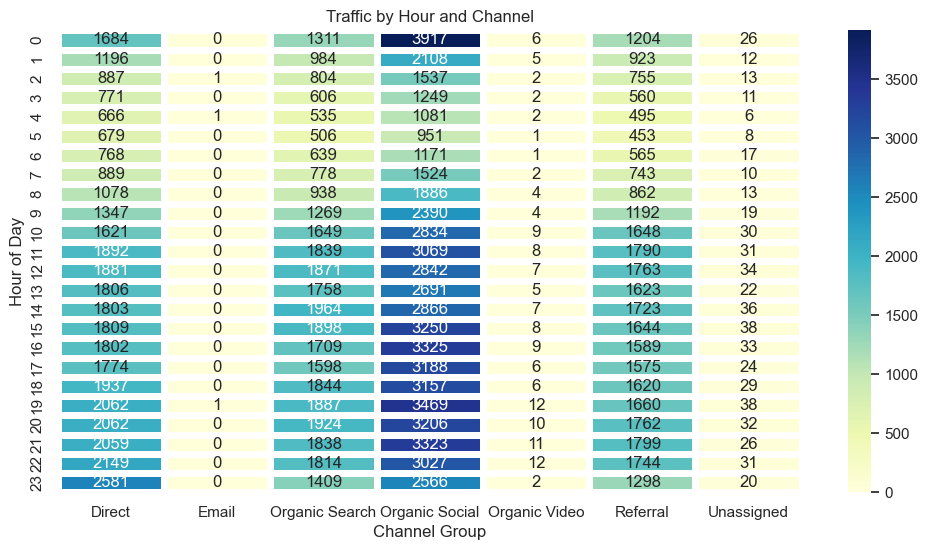

In [17]:
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_df, cmap="YlGnBu", linewidths=5, annot=True,fmt='.0f')
plt.title('Traffic by Hour and Channel')
plt.xlabel('Channel Group')
plt.ylabel('Hour of Day')
plt.show()

# Engagment rate vs Sessions over time

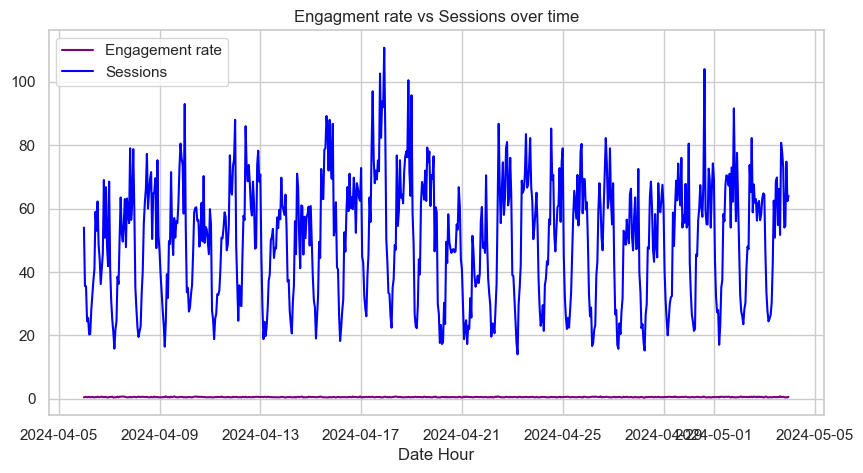

In [18]:
df_plot = df.groupby("Date Hour")[["Engagement rate","Sessions"]].mean().reset_index()

plt.figure(figsize=(10,5))
plt.plot(df_plot['Date Hour'], df_plot['Engagement rate'], label="Engagement rate", color="purple")
plt.plot(df_plot['Date Hour'], df_plot['Sessions'], label="Sessions", color="blue")
plt.title('Engagment rate vs Sessions over time')
plt.xlabel('Date Hour')
plt.legend()
plt.grid(True)
plt.show()